In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import imageio

import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
from stack_segmentation.stack import Stack

In [4]:
carb_stacks = ['carb71', 'carb96558', 'carbRNF', 'SPE_carb10_58_box3']
soil_stacks = ['SoilAh-1', 'SoilB-2', 'TeTree_subset1', 'TiTree_subset2']
urna_stacks = ['Urna_22', 'Urna_30', 'Urna_34']

In [5]:
for folder_path in carb_stacks:
    stack = Stack.read_from_source('./data/{}'.format(folder_path))
    print(folder_path, stack.shape)

720it [00:01, 696.37it/s]
100%|██████████| 720/720 [00:07<00:00, 94.36it/s] 
88it [00:00, 870.62it/s]

carb71 (720, 720, 720)


720it [00:00, 879.64it/s]
100%|██████████| 720/720 [00:07<00:00, 94.18it/s] 
88it [00:00, 879.78it/s]

carb96558 (720, 720, 720)


700it [00:00, 917.04it/s]
100%|██████████| 700/700 [00:06<00:00, 101.11it/s]
128it [00:00, 1276.85it/s]

carbRNF (700, 700, 700)


509it [00:00, 1249.82it/s]
100%|██████████| 509/509 [00:02<00:00, 198.13it/s]


SPE_carb10_58_box3 (509, 509, 509)


In [26]:
for folder_path in soil_stacks:
    stack = Stack.read_from_source('./data/{}'.format(folder_path))
    print(folder_path, stack.shape)

700it [00:03, 217.94it/s]
100%|██████████| 700/700 [00:06<00:00, 101.21it/s]
25it [00:00, 244.64it/s]

SoilAh-1 (700, 700, 700)


700it [00:02, 233.68it/s]
100%|██████████| 700/700 [00:06<00:00, 109.80it/s]
16it [00:00, 154.97it/s]

SoilB-2 (700, 700, 700)


710it [00:04, 154.93it/s]
100%|██████████| 710/710 [00:06<00:00, 104.68it/s]
16it [00:00, 154.68it/s]

TeTree_subset1 (710, 710, 710)


710it [00:04, 155.04it/s]
100%|██████████| 710/710 [00:07<00:00, 98.46it/s] 


TiTree_subset2 (710, 710, 710)


In [27]:
for folder_path in urna_stacks:
    stack = Stack.read_from_source('./data/{}'.format(folder_path))
    print(folder_path, stack.shape)

710it [00:03, 214.67it/s]
100%|██████████| 710/710 [00:07<00:00, 99.21it/s] 
22it [00:00, 218.96it/s]

Urna_22 (710, 710, 710)


710it [00:03, 219.44it/s]
100%|██████████| 710/710 [00:07<00:00, 99.04it/s] 
23it [00:00, 227.06it/s]

Urna_30 (710, 710, 710)


700it [00:03, 219.10it/s]
100%|██████████| 700/700 [00:06<00:00, 108.14it/s]


Urna_34 (700, 700, 700)


In [5]:
folder_path = './data/carb71'

In [6]:
# stack = Stack.read_from_source(folder_path)

In [7]:
# stack.shape

In [8]:
# stack_train = stack[:, :, :230]
# stack_val = stack[:, :, 250:470]
# stack_test = stack[:, :, 490:]

In [9]:
# l = []
# for i in tqdm(range(stack.targets.shape[2])):
#     for j in range(i + 1, stack.targets.shape[2]):
#         a = stack.targets[:, :, i]
#         b = stack.targets[:, :, j]
#         x = (a == 255).astype(int) + (b == 255).astype(int)
#         l.append((x >= 1).sum() / (x == 2).sum())

In [10]:
# plt.hist(l, bins=200)
# plt.show()

In [6]:
# import torch
# from torch import nn

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [7]:
# from stack_segmentation.carb96558_config import data_conf
# from stack_segmentation.soilB_2_config import data_conf
# from stack_segmentation.urna_22_config import data_conf
from stack_segmentation.all_stacks_config import data_conf

In [8]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:00, 761.69it/s]
100%|██████████| 720/720 [00:07<00:00, 94.16it/s] 
8280it [00:00, 265482.57it/s]
7920it [00:00, 240688.67it/s]
700it [00:00, 815.47it/s]
100%|██████████| 700/700 [00:06<00:00, 102.68it/s]
8280it [00:00, 261851.47it/s]
7920it [00:00, 254083.58it/s]
710it [00:00, 903.56it/s]
100%|██████████| 710/710 [00:07<00:00, 99.87it/s] 
7920it [00:00, 256441.26it/s]
7560it [00:00, 240870.67it/s]
720it [00:00, 807.75it/s]
100%|██████████| 720/720 [00:07<00:00, 97.20it/s] 
8280it [00:00, 254871.84it/s]
720it [00:00, 874.18it/s]
100%|██████████| 720/720 [00:07<00:00, 95.47it/s] 
8280it [00:00, 247169.78it/s]
700it [00:00, 930.00it/s]
100%|██████████| 700/700 [00:06<00:00, 102.91it/s]
8280it [00:00, 251563.45it/s]
509it [00:00, 1247.00it/s]
100%|██████████| 509/509 [00:02<00:00, 198.75it/s]
3664it [00:00, 252139.95it/s]
700it [00:00, 893.99it/s]
100%|██████████| 700/700 [00:06<00:00, 108.18it/s]
8280it [00:00, 70819.10it/s]
700it [00:00, 927.56it/s]
100%|██████████| 700/700 [00

In [10]:
len(data_train), len(data_val), len(data_test)

(24480, 23400, 11)

In [11]:
# data_train[0]

In [12]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

In [13]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [14]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [15]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

In [16]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.069803


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.02525
Epoch 1...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.036527


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.024547
Epoch 2...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.035252


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.023715
Epoch 3...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.034364


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.020151
Epoch 4...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.033685


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.018042
Epoch 5...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.033406


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.019743
EarlyStopping counter: 1 out of 5
Epoch 6...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.032875


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.019784
EarlyStopping counter: 2 out of 5
Epoch 7...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.032814


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.017995
Epoch 8...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.032467


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01428
Epoch 9...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.032282


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.014194
Epoch 10...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.032064


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01381
Epoch 11...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.031712


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.013163
Epoch 12...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.031517


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.013222
EarlyStopping counter: 1 out of 5
Epoch 13...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.031577


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.013189
EarlyStopping counter: 2 out of 5
Epoch 14...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.031074


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.012394
Epoch 15...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030983


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.012116
Epoch 16...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030525


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.013635
EarlyStopping counter: 1 out of 5
Epoch 17...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030515


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.016118
EarlyStopping counter: 2 out of 5
Epoch 18...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030473


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.013063
EarlyStopping counter: 3 out of 5
Epoch 19...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030193


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01289
EarlyStopping counter: 4 out of 5
Epoch 20...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030289


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011908
Epoch 21...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.030087


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.012003
EarlyStopping counter: 1 out of 5
Epoch 22...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029983


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011641
Epoch 23...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029955


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011504
Epoch 24...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029892


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.012667
EarlyStopping counter: 1 out of 5
Epoch 25...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029747


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011419
Epoch 26...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029438


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011427
Epoch 27...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029579


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011404
Epoch 28...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029523


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.015785
EarlyStopping counter: 1 out of 5
Epoch 29...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029634
Epoch    29: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01149
EarlyStopping counter: 2 out of 5
Epoch 30...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029132


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011403
Epoch 31...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029201


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01155
EarlyStopping counter: 1 out of 5
Epoch 32...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029119


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01105
Epoch 33...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028895


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011083
EarlyStopping counter: 1 out of 5
Epoch 34...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028986


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011175
EarlyStopping counter: 2 out of 5
Epoch 35...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.029147


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011243
EarlyStopping counter: 3 out of 5
Epoch 36...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028716


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011158
EarlyStopping counter: 4 out of 5
Epoch 37...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028578


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01096
Epoch 38...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028878


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011058
EarlyStopping counter: 1 out of 5
Epoch 39...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028772


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011132
EarlyStopping counter: 2 out of 5
Epoch 40...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028759
Epoch    40: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011145
EarlyStopping counter: 3 out of 5
Epoch 41...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028552


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011177
EarlyStopping counter: 4 out of 5
Epoch 42...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.02847


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.010835
Epoch 43...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028374


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.011175
EarlyStopping counter: 1 out of 5
Epoch 44...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028366


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.010906
EarlyStopping counter: 2 out of 5
Epoch 45...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028467


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.010841
Epoch 46...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.02825


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.010873
EarlyStopping counter: 1 out of 5
Epoch 47...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028287


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.010752
Epoch 48...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.02823


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.01083
EarlyStopping counter: 1 out of 5
Epoch 49...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.028267


100%|██████████| 732/732 [00:53<00:00, 13.66it/s]


Mean val loss: 0.010764


100%|██████████| 259/259 [02:17<00:00,  2.06it/s]


In [17]:
import pickle
import json
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [18]:
data_conf['conf_name']

'3stacks'

In [19]:
len(results['train_losses'])

50

In [18]:
t = [np.mean(item['iou']) for item in results['test_metrics']]

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

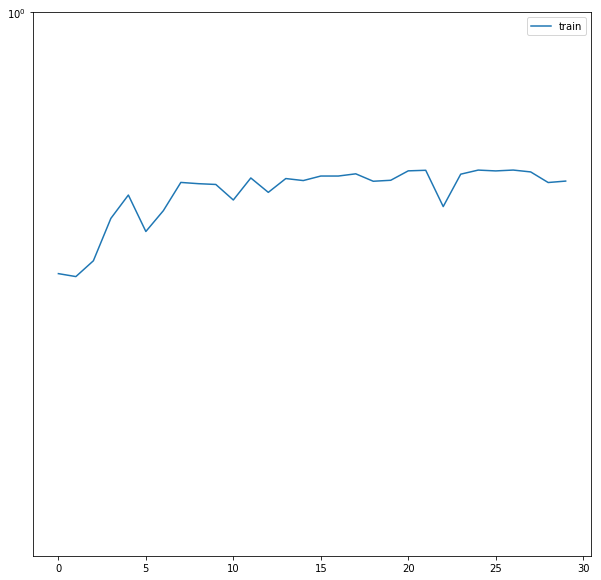

In [23]:
# trainl = [np.mean(item) for item in train_loss]
# vall = [np.mean(item) for item in val_loss]
# testl = [np.mean(item) for item in test_loss]

plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(t)), t, label='train')
# plt.plot(np.arange(len(vall)), vall, label='val')
# plt.plot(np.arange(len(vall)), moving_average(vall), label='val MA')
# plt.plot(np.arange(len(testl)), testl, label='test')
plt.yscale('log')
plt.legend(loc='best')
# plt.xlim([])
plt.ylim([0.97, 1])
plt.show()

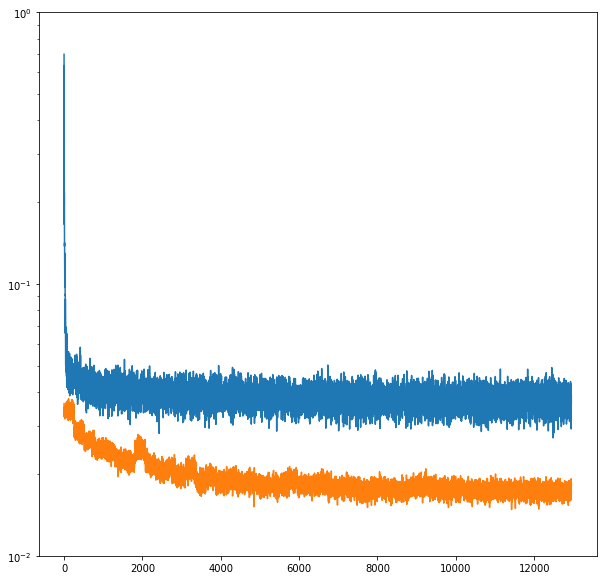

In [29]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(train_losses)), train_losses)
plt.plot(np.arange(len(val_losses)), val_losses)
plt.yscale('log')
plt.ylim([1e-2, 1])
plt.show()

In [38]:
stack_test.apply(model, patch_sizes=(128, 128, 1), bs=1, num_workers=16, device='cuda:0')

4144it [00:00, 207227.37it/s]
100%|██████████| 4144/4144 [00:01<00:00, 3920.70it/s]


In [39]:
q = _

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [65]:
def iou(gt, pred):
    return 1.0 * (gt * pred).sum() / ((gt + pred) >= 1).sum()

In [49]:
f1_score(b, a > 0.5)

0.9968367113630757

In [50]:
precision_score(b, a > 0.5)

0.9986373513519562

In [51]:
recall_score(b, a > 0.5)

0.9950425531439754

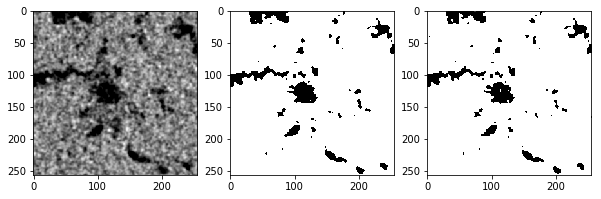

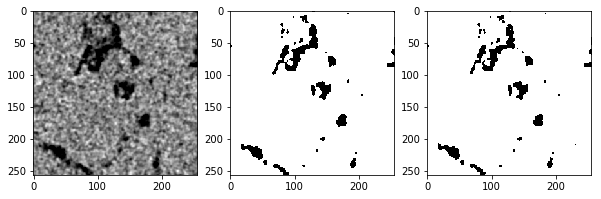

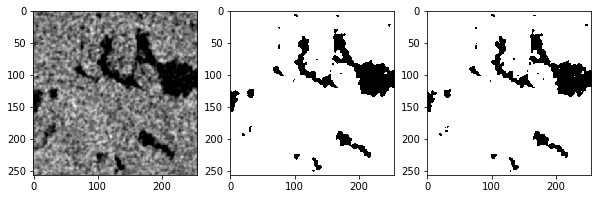

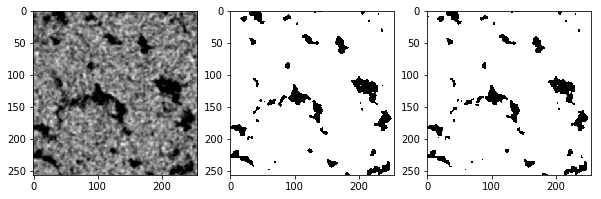

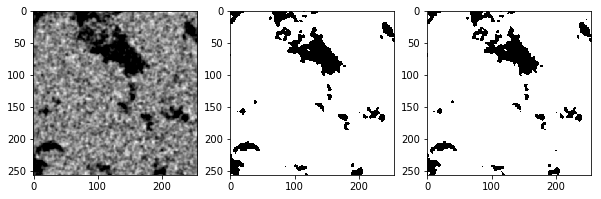

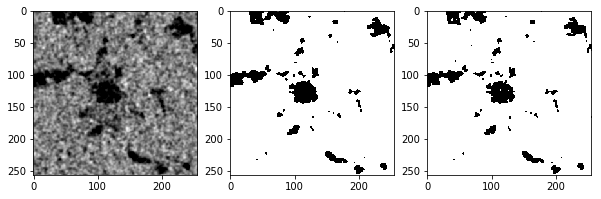

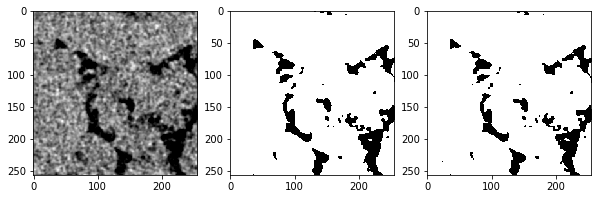

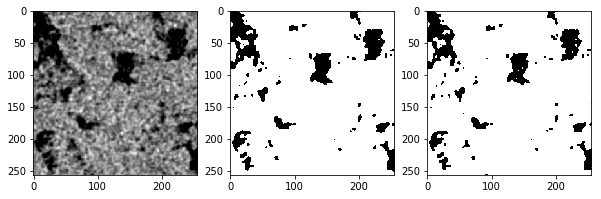

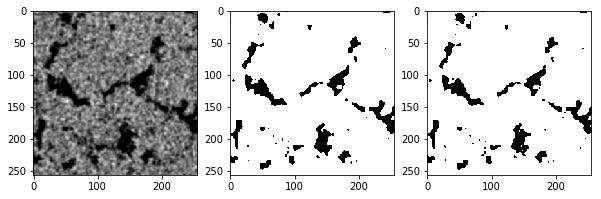

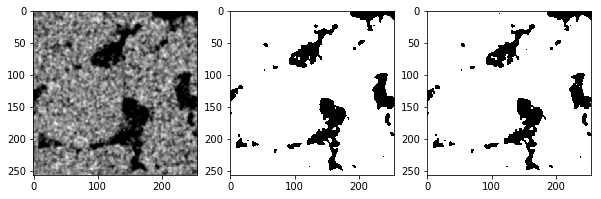

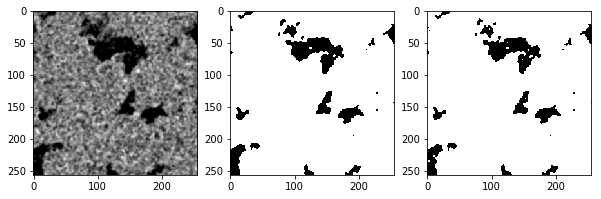

In [41]:
# sigmoid = lambda x: 1/(1 + np.exp(-x))

for i, (image, mask) in enumerate(dataloader_test):
    if i > 10:
        break
        
    sample = torch.from_numpy(image)
    pred = model((sample).to(device)).cpu().data.numpy()
    e = pred[0]
    e = e - e.max(axis=0, keepdims=True)
    e = np.exp(e)
    e = e / np.sum(e, axis=0, keepdims=True)

    threshold = 0.5
    
    plt.figure(figsize=(10,8))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image[0, 0], 'gray')
    
    plt.subplot(1, 3, 2)
#     output = sigmoid(pred)
    output = np.where(e[1] > threshold, 255, 0).astype(np.uint8)
    plt.imshow(output, 'gray')
    
    plt.subplot(1, 3, 3)
    plt.imshow(mask[0], 'gray')
    
    plt.show()

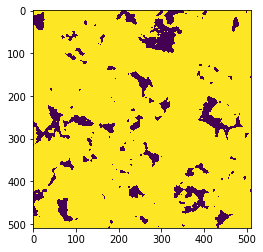

In [156]:
plt.imshow(q.logits[:, :, 200])
plt.show()